<a href="https://colab.research.google.com/github/jin930303/AIStudy24/blob/master/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사진이나 이미지 동영상 등은 대체적으로 용량이 커서 보관하기 힘들기 때문에
주성분만 분석해서 가지고 있으면 디스크 용량 등에 이로움이 있다( 차원축소 알고리즘)

데이터가 가진 속성을 특성이라고 함 (사진에 특성 : R:빨 G :녹 B:파 K :검 , A: 필터)

-> 과일 사진의 겨우 10,000개의 픽셀이 있기 때문에 10,000 개의 특성이 있다 -> 차원 ( dimension : 디멘션)

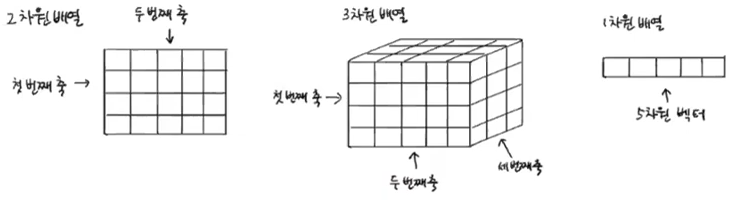

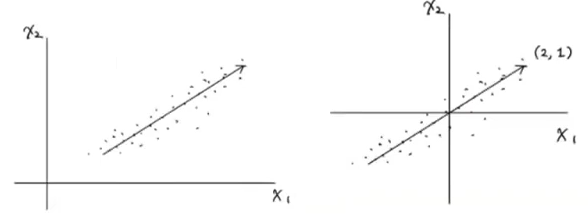
<br>
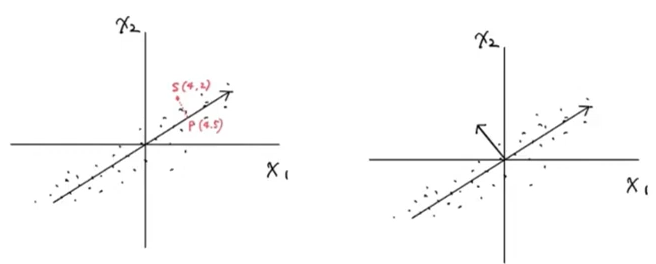

In [1]:
# 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다.

# 차원축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고
#            지도 학습 모델의 성능을 향상시키기 위함

# 주성분 분석 (PCA : Principal Component Analysis)
#             : 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수 도 있어야 함
#    https://ddongwon.tistory.com/114

# 주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는것으로 이해 ( 분산 : 데이터가 널리 퍼져있는 정도)
#       -> 데이터를 잘 표현하는 벡터 ?

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-01-08 05:50:40--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-08 05:50:40--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-08 05:50:40--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

from sklearn.decomposition import PCA       # 주성분 분석 알고리즘 사용
# 사이킷런의 decomposition 모듈 아래 PCA 클래스로 활용
pca = PCA(n_components=50)      # PCA 클래스를 만들 때 주성분의 갯수를 지정함 50
pca.fit(fruits_2d)  # 비지도 학습임으로 타깃 제외 학습

PCA(n_components=50)

In [4]:
print(pca.components_.shape)    # components_ 주성분이 들어있는 속성
# 50개의 속성에 10000개(100 * 100 해상도)의 특성수


(50, 10000)


In [6]:
# 그림으로 출력하기 위한 draw_fruit()를 만들어봄
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio =1): # ratio = 비율 , 비             배열의 값을 이용해서 이미지로 출력해주는 메서드
    n = len(arr)    # n은 샘플 갯수
    # 한 줄에 10개씩 이미지를 그린다. 샘플 갯수를 10으로 나눠 전체 행 갯수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 갯수는 샘플 갯수이다 . 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols) :
            if i * 10 + j < n :     # n개 까지만 그린다.
                axs[ i , j ].imshow(arr[i *10 + j], cmap='gray_r')
            axs[i , j].axis('off')
    plt.show()

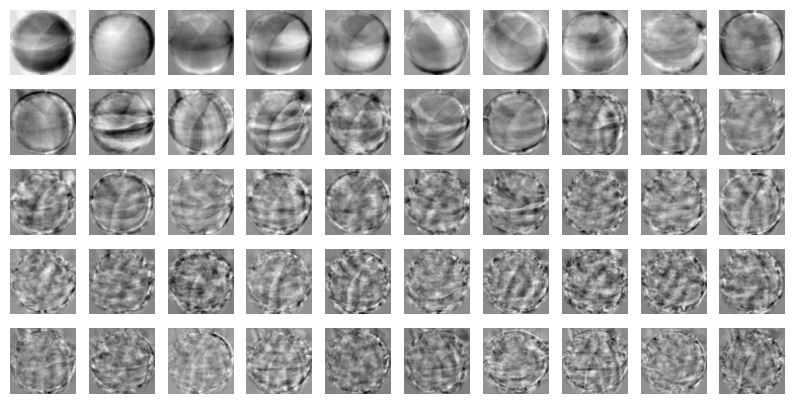

In [7]:
draw_fruits(pca.components_.reshape(-1,100,100))    # 10* 5 =50
# 주 성분은 원본데이터를 투영하여 특성의 갯수를 만들어냄
# 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것
# 데이터셋에 있는 어떤 특징을 잡아낸 것 처럼 생각해도 됨


In [12]:
# 주성분을 찾았으니, 원본 데이터를 주성분에 투영해서 특성의 갯수를 10,000개에서 50개로 줄일 수 있다.
# -> 원본의 분해

# transform() 메서드를 사용해서 원본데이터의 차원을 줄여본다.

fruits_pca = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [15]:
# 10000개의 특성을 50개로 줄였으니 어느정도의 손실이 발생할 수 있다.
# 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에
# 원본 데이터를 상당부분 재구성이 가능하다.
# 원본 데이터의 재구성 -> inverse_transform()
fruits_inverse = pca.inverse_transform(fruits_pca)  # 원본처럼 재구성
print(fruits_inverse.shape) # 50개의 특성을 다시 10000개로 복원

(300, 10000)


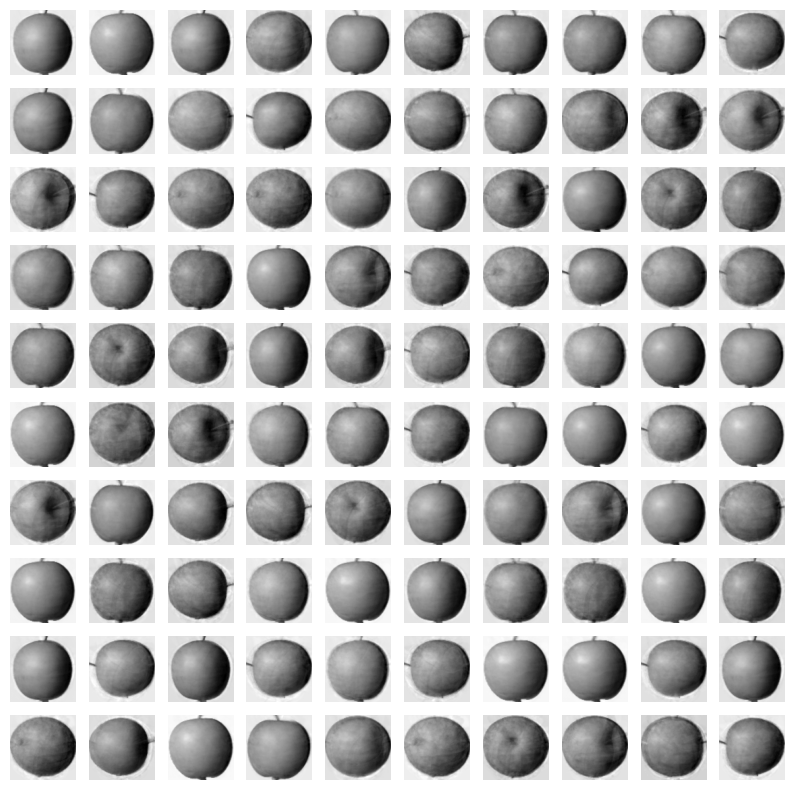

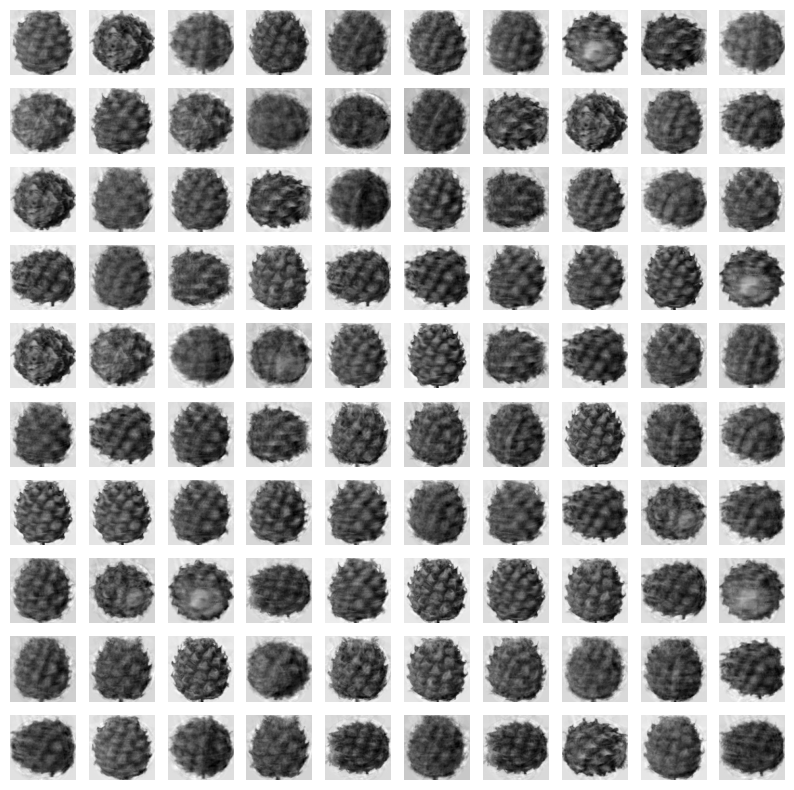

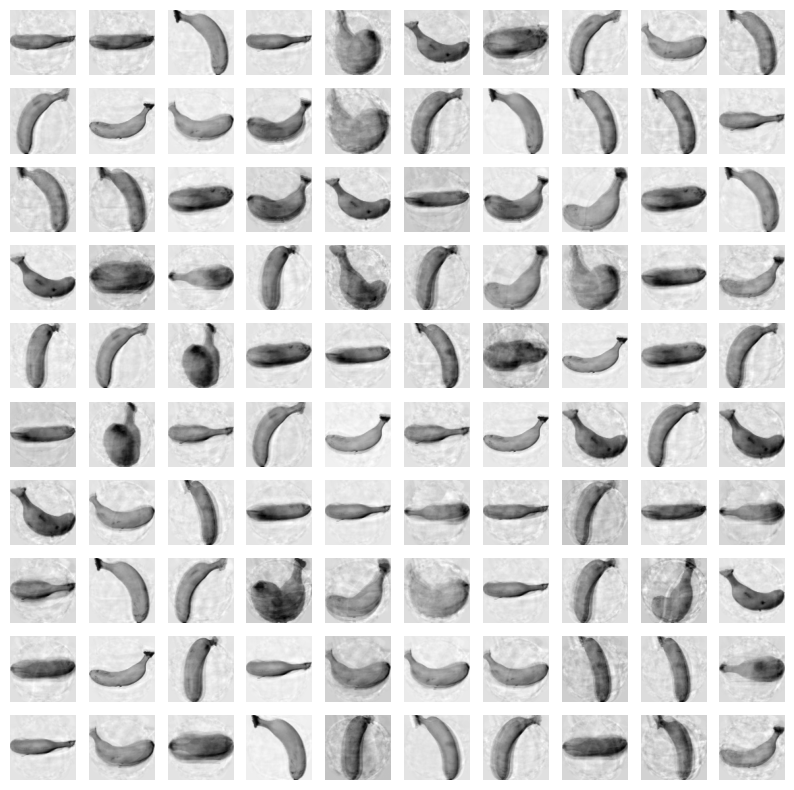

In [16]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [17]:
# 거의 모든 파일이 잘 복원된 듯 보인다. 특징을 잘 찾아낸 것 같다.
# 일부 흐리고 번진 부분도 있지만 중요한 부분은 아님
# 불과 50개의 특성을 10000개로 늘린 것을  감안하면 성공적
# 만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다.
# 50개의 특성은 얼마나 분산을 보존하고 있는지 알아보자

# 설명된 분산(explained variance) : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# PCA 클래스의 explained_variance_ratio 에 주성분의 설명된 분산 비율이 기록되어 있다.
# 첫번째 주성분의 설명된 분산이 가장 큼
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_))
# 92%가 넘는 분산을 유지하고 있음 ( 이미지 품질 )

0.9215365627981057


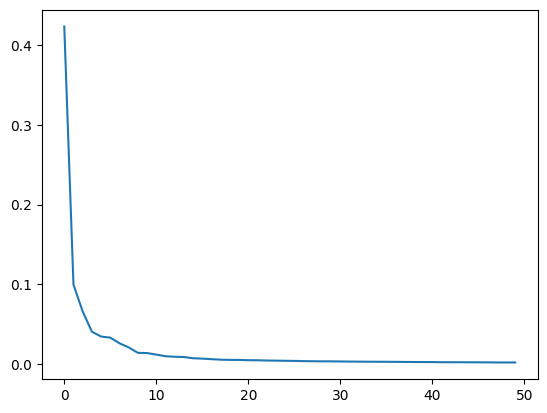

In [18]:
plt.plot(pca.explained_variance_ratio_)
# 그래프의 처음 10개가 주성분의 대부분을 표현하고 있음

In [19]:
# 위에 만든 주성분으로 지도학습 모델에 적용해보자
# 전에 사용했던 로지스틱 회귀 모델을 사용

from sklearn.linear_model import LogisticRegression
# 사이킷런의 로지스틱클래스

lr = LogisticRegression()


In [20]:
# 지도학습 모델을 사용하기 위해 타겟을 생성한다.
# 사과 0, 파인애플1, 바나나 2
target = np.array([0]*100 + [1]*100 + [2]*100)
# 파이썬 리스트에 정수를 곱하면 리스트 안의 원소를 정수만큼 반복함
# 100개씩의 0, 1, 2 로 이루어진 타겟 데이터를 만듬

In [22]:
from sklearn.model_selection import cross_validate  # cross_validate 크로스 검증

scores = cross_validate(lr, fruits_2d,target)   # fruits_2d 원본데이터를 사용
print(np.mean(scores['test_score']))    # 99.66% 과대적합
# 특성이 10000개가 되기 때문에 300개의 샘플에서는 과대적합 모델이 된다.
print(np.mean(scores['fit_time']))      # 0.89초 정도 걸림

0.9966666666666667
0.8928001880645752


In [23]:
scores = cross_validate(lr,fruits_pca,target)   #fruits_pca PCA로 축소한 자료 사용
print(np.mean(scores['test_score']))            # 99%의 과대적합    위와 같음
print(np.mean(scores['fit_time']))              # 0.01초로 빠르게 처리됨
# 결론 : 속도가 빠르고 용량도 적다.
# PCA로 훈련 데이터의 차원을 축소하면 저장 공간 과 시간을 절약할 수 있다.

0.9966666666666667
0.013774538040161132


In [24]:
# 앞에서는 PCA 클래스를 사용할 때 n_components 매개변수에 주성분 갯수를 50개로 진행했다.

# 이 대신 비율로 줄 수도 있다.  50%

pca = PCA(n_components=0.5) # 주성분 50% (0~1 사이의 실수로 입력)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [25]:
print(pca.n_components_)
# 2개의 주성분으로 2개의 특성만으로 원본데이터의 분산 50%를 표현할 수 있다.

2


In [27]:
fruits_pca =pca.transform(fruits_2d)
print(fruits_pca.shape) # 300개의 요소에 2개의 주성분

(300, 2)


In [28]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))            # 99.33% 과대적합
print(np.mean(scores['fit_time']))              # 0.02초 시간 조금 증가

0.9933333333333334
0.028656387329101564


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

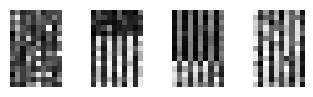

In [43]:
draw_fruits(fruits_pca.reshape(-1,15,10))

In [45]:
from sklearn.cluster import KMeans
# 차원 축소된 데이터를 사용하여 k-평균 알고리즘으로 클러스터를 찾아봄
km= KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)


KMeans(n_clusters=3, random_state=42)

In [46]:
print(np.unique(km.labels_,return_counts=True))
# 전에 있던 값 (array([0, 1, 2], dtype=int32), array([110,  99,  91]))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


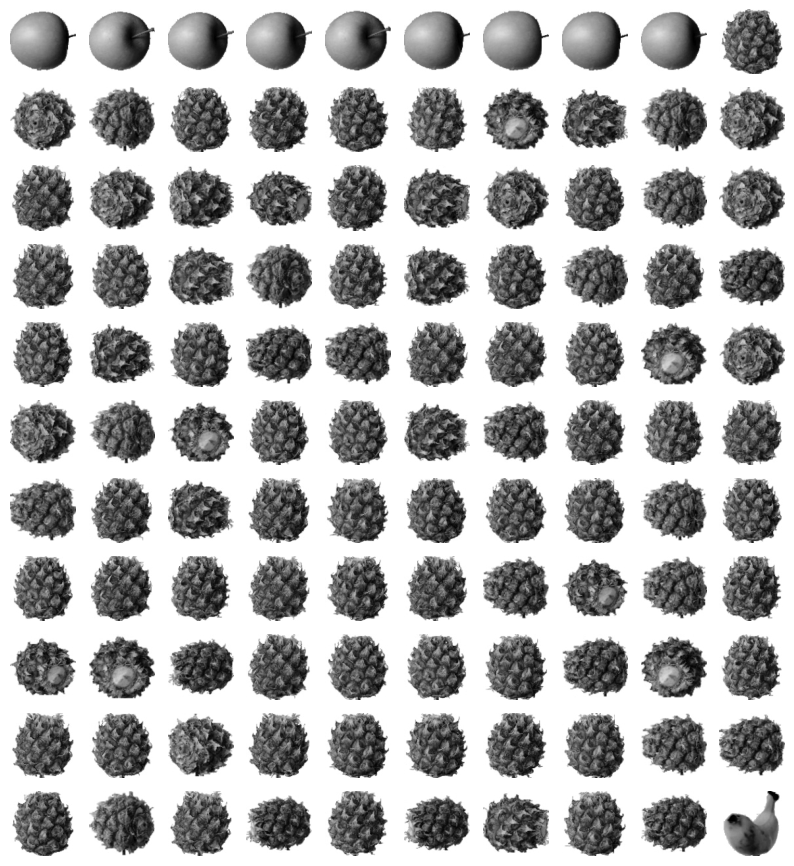

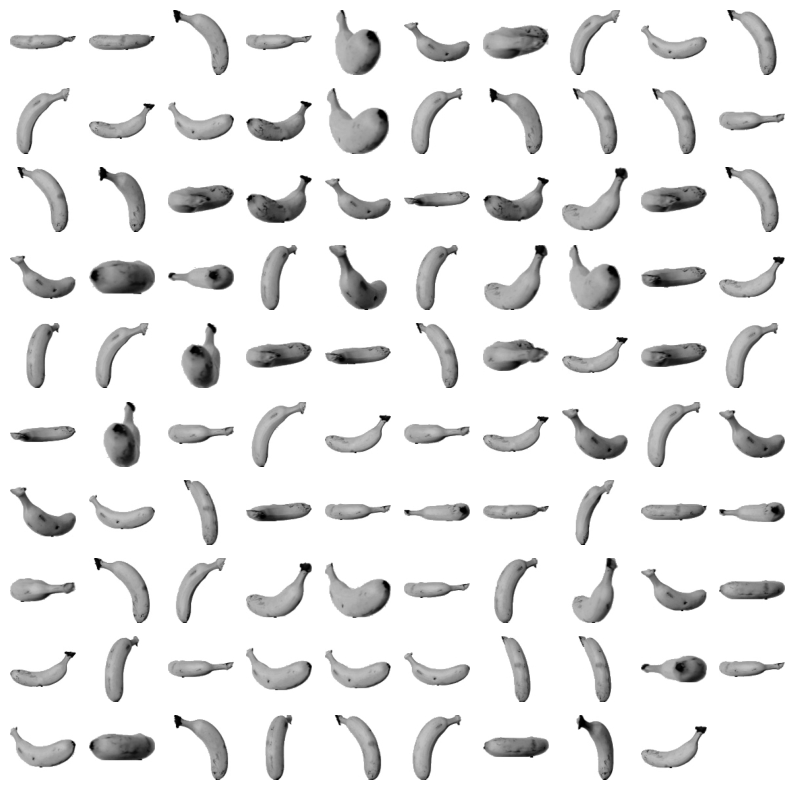

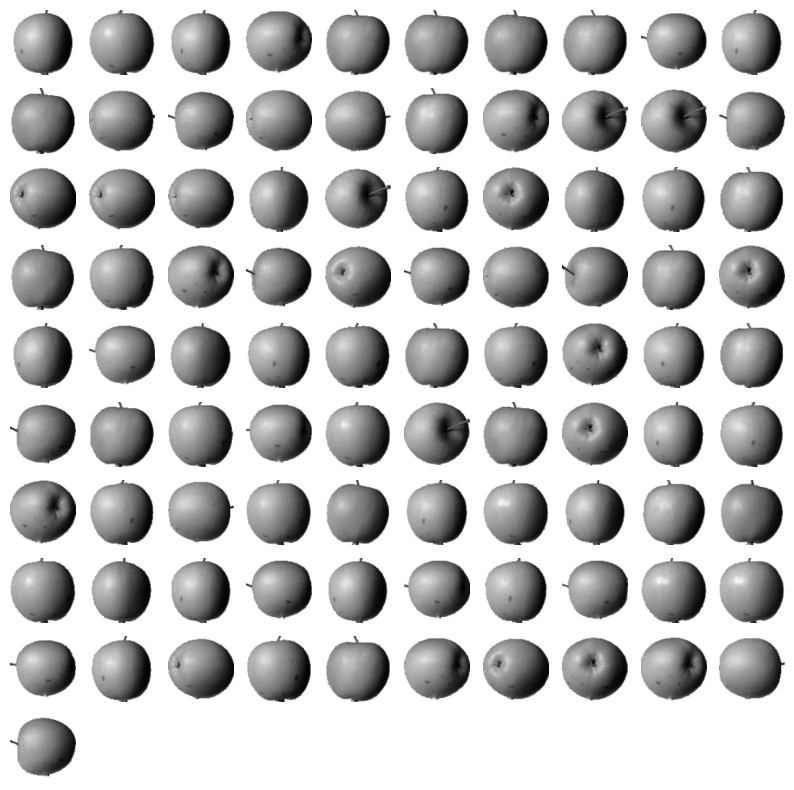

In [48]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")
# KMeans 가 찾은 레이브을 사용해 과일 이미지를 출력

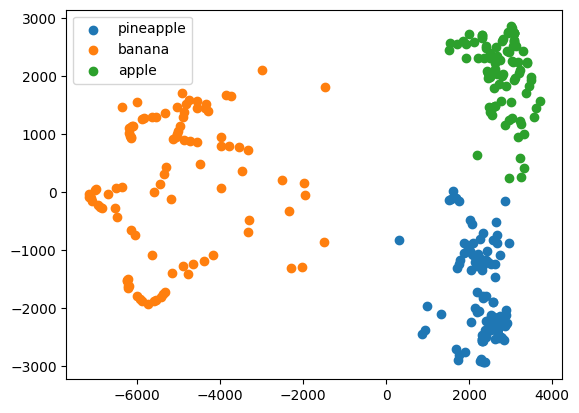

In [51]:
# 훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화가 가능하다.
# 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.
# fruits_pca 데이터가 2개의 특성으로 있기때문에 2차원으로 표현할 수 있다.
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
                    # kn.labels_ 를 사용해 클러스터별로 나누어 산점도를 그림
    plt.scatter(data[:,0],data[:,1])
plt.legend(['pineapple','banana','apple'])  # 범례표시
plt.show()